<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Natural-Language-Processing/blob/main/Conversational_AI_Chatbot_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conversational AI Chatbot with Transformers

In [1]:
pip install transformers

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "microsoft/DialoGPT-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

#Generating Responses with Greedy Search

Greedy search simply selects the word with the highest probability as its next word: 


w_t = argmax_{w}P(w | w_{1:t-1})w 
t
​
 =argmax 
w
​
 P(w∣w 
1:t−1
​
 ) 
 
 at each timestep tt. 

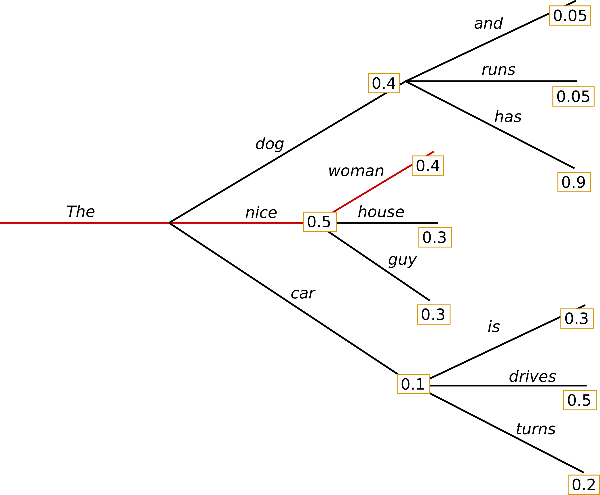

In [ ]:
# chatting 10 times with greedy search
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        pad_token_id=tokenizer.eos_token_id,
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")

#Explanation of the Code:

We first take input from the user for chatting.

We encode the text to input_ids using the DialoGPT tokenizer, we also append the end of the string token and return it as a Pytorch tensor.

If this is the first time chatting with the bot, then we directly feed input_ids to our model for a generation.

Otherwise, we append the chat history using concatenation with the help of torch.cat() method.

After that, we use the model.generate() method for generating the chatbot response.

Lastly, as the returned output is a tokenized sequence too, we decode the sequence using tokenizer.decode() and set skip_special_tokens to True to make sure we don't see any annoying special tokens such as <|endoftext|>. Also, since the model returns the whole sequence, we skip the previous chat history and print only the newly generated chatbot answer.

#Generating Responses with Beam Search

Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability.

In [ ]:
# chatting 5 times with beam search
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        num_beams=3,
        early_stopping=True,
        pad_token_id=tokenizer.eos_token_id
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")

#Generating Responses with Sampling


In its most basic form, sampling means randomly picking the next word w_tw 
t
​
  according to its conditional probability distribution:

w_t \sim P(w|w_{1:t-1})
w 
t
​
 ∼P(w∣w 
1:t−1
​
 )

In [ ]:
# chatting 5 times with sampling
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        top_k=0,
        pad_token_id=tokenizer.eos_token_id
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")

#Top-K Sampling

In Top-K sampling, the K most likely next words are filtered and the probability mass is redistributed among only those K next words.

In [ ]:
# chatting 5 times with Top K sampling & tweaking temperature
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        top_k=100,
        temperature=0.75,
        pad_token_id=tokenizer.eos_token_id
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")

#Top-p (nucleus) sampling

Instead of sampling only from the most likely K words, in Top-p sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability p. The probability mass is then redistributed among this set of words. This way, the size of the set of words (a.k.a the number of words in the set) can dynamically increase and decrease according to the next word's probability distribution.

In [ ]:
# chatting 5 times with nucleus sampling & tweaking temperature
for step in range(5):
    # take user input
    text = input(">> You:")
    # encode the input and add end of string token
    input_ids = tokenizer.encode(text + tokenizer.eos_token, return_tensors="pt")
    # concatenate new user input with chat history (if there is)
    bot_input_ids = torch.cat([chat_history_ids, input_ids], dim=-1) if step > 0 else input_ids
    # generate a bot response
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        top_p=0.95,
        top_k=0,
        temperature=0.75,
        pad_token_id=tokenizer.eos_token_id
    )
    #print the output
    output = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    print(f"DialoGPT: {output}")